# importing library

In [26]:
import pandas as pd
import pyodbc as DB 
import matplotlib.pyplot as plt
from calendar import month_name
%matplotlib inline

# Connect with database 

In [27]:
Connect = 'Driver={SQL Server Native Client 11.0};;Database=Market;Uid=Python;Pwd=8122;'

cnxn = DB.connect(Connect)

# SQL 

In [28]:
SQL  = """
   EXEC Sales;
"""
Data = pd.read_sql_query(SQL,cnxn)
Data

,Row ID,Order ID,Order Date,Customer Name,Segment Name,Ship Mode,Product Name,Category,Sub-category,Country,Region,State,City,Quantity,Sales,Profit
0,1,MX-2014-143658,2014-10-02,Sonia Cooley,Consumer,Standard Class,"Hon File Folder Labels, Adjustable",Office Supplies,Labels,Mexico,North,Distrito Federal,Mexico City,3,13.080000,4.560000
1,2,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Tenex Clock, Durable",Furniture,Furnishings,Colombia,South,Risaralda,Dos Quebradas,8,252.160004,90.720001
2,3,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Ikea 3-Shelf Cabinet, Mobile",Furniture,Bookcases,Colombia,South,Risaralda,Dos Quebradas,2,193.279999,54.080002
3,4,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Cardinal Binder, Clear",Office Supplies,Binders,Colombia,South,Risaralda,Dos Quebradas,4,35.439999,4.960000
4,5,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Sanford Canvas, Water Color",Office Supplies,Art,Colombia,South,Risaralda,Dos Quebradas,2,71.599998,11.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51286,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Avery Binder Covers, Economy",Office Supplies,Binders,Hungary,EMEA,Budapest,Budapest,1,11.070000,3.420000
51286,51287,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Logitech Flash Drive, USB",Technology,Accessories,Hungary,EMEA,Budapest,Budapest,2,61.439999,18.420000
51287,51288,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Boston Highlighters, Fluorescent",Office Supplies,Art,Hungary,EMEA,Budapest,Budapest,4,80.519997,20.879999
51288,51289,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Enermax Computer Printout Paper, 8.5 x 11",Office Supplies,Paper,Hungary,EMEA,Budapest,Budapest,4,130.440002,33.840000


In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         51290 non-null  int64  
 1   Order ID       51290 non-null  object 
 2   Order Date     51290 non-null  object 
 3   Customer Name  51290 non-null  object 
 4   Segment Name   51290 non-null  object 
 5   Ship Mode      51290 non-null  object 
 6   Product Name   51290 non-null  object 
 7   Category       51290 non-null  object 
 8   Sub-category   51290 non-null  object 
 9   Country        51290 non-null  object 
 10  Region         51290 non-null  object 
 11  State          51290 non-null  object 
 12  City           51290 non-null  object 
 13  Quantity       51290 non-null  int64  
 14  Sales          51290 non-null  float64
 15  Profit         51290 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 6.3+ MB


# Formate date column and add column

In [30]:
Data['Order Date'] = pd.to_datetime(Data['Order Date'])
Data['year'] = Data['Order Date'].dt.year
Data['month'] = Data['Order Date'].dt.strftime('%B')
Data

,Row ID,Order ID,Order Date,Customer Name,Segment Name,Ship Mode,Product Name,Category,Sub-category,Country,Region,State,City,Quantity,Sales,Profit,year,month
0,1,MX-2014-143658,2014-10-02,Sonia Cooley,Consumer,Standard Class,"Hon File Folder Labels, Adjustable",Office Supplies,Labels,Mexico,North,Distrito Federal,Mexico City,3,13.080000,4.560000,2014,October
1,2,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Tenex Clock, Durable",Furniture,Furnishings,Colombia,South,Risaralda,Dos Quebradas,8,252.160004,90.720001,2012,October
2,3,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Ikea 3-Shelf Cabinet, Mobile",Furniture,Bookcases,Colombia,South,Risaralda,Dos Quebradas,2,193.279999,54.080002,2012,October
3,4,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Cardinal Binder, Clear",Office Supplies,Binders,Colombia,South,Risaralda,Dos Quebradas,4,35.439999,4.960000,2012,October
4,5,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Sanford Canvas, Water Color",Office Supplies,Art,Colombia,South,Risaralda,Dos Quebradas,2,71.599998,11.440000,2012,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51286,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Avery Binder Covers, Economy",Office Supplies,Binders,Hungary,EMEA,Budapest,Budapest,1,11.070000,3.420000,2012,September
51286,51287,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Logitech Flash Drive, USB",Technology,Accessories,Hungary,EMEA,Budapest,Budapest,2,61.439999,18.420000,2012,September
51287,51288,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Boston Highlighters, Fluorescent",Office Supplies,Art,Hungary,EMEA,Budapest,Budapest,4,80.519997,20.879999,2012,September
51288,51289,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Enermax Computer Printout Paper, 8.5 x 11",Office Supplies,Paper,Hungary,EMEA,Budapest,Budapest,4,130.440002,33.840000,2012,September


# Sales & profit overview

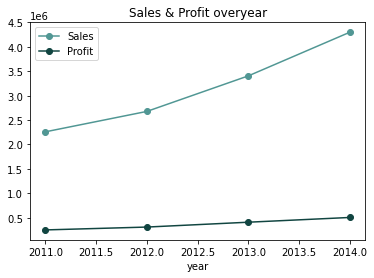

,Sales,Profit,Quantity
year,,,
2011,2.259451e+06,248940.811236,31443
2012,2.677439e+06,307415.279248,38111
2013,3.405746e+06,406935.228795,48136
2014,4.299866e+06,504165.970854,60622


In [31]:
# Define matching colors 
colors = ['#519794', '#114541']

#Sales&Profit overyear
overyear = Data.groupby('year')[['Sales','Profit']].sum()
pd.DataFrame(overyear)
overyear.plot(kind = 'line',y = ['Sales','Profit'],color=colors,marker='o')
plt.title('Sales & Profit overyear')
plt.show()
year_totals = Data.groupby('year')[['Sales', 'Profit', 'Quantity']].sum()
year_totals

<Figure size 720x432 with 0 Axes>

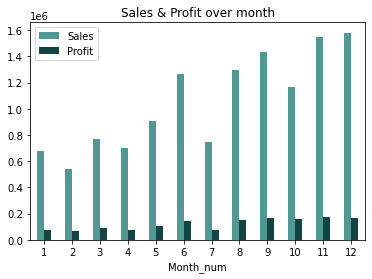

<Figure size 720x432 with 0 Axes>

,Sales,Profit,Quantity
month,,,
April,6.985612e+05,73513.630821,10552
August,1.293833e+06,151854.109747,17611
December,1.580781e+06,170718.127104,22314
February,5.437394e+05,70932.199283,7281
January,6.751337e+05,73535.384639,8843
July,7.493818e+05,78070.091612,10984
June,1.269717e+06,147079.416596,18119
March,7.705009e+05,94087.521353,10481
May,9.040123e+05,104509.783861,13042


In [32]:
#Sales&Profit overmonth
Data['Month_num'] = Data['Order Date'].dt.month
overmonth = Data.groupby('Month_num')[['Sales', 'Profit']].sum()
month_totals = Data.groupby('month')[['Sales', 'Profit', 'Quantity']].sum()


overmonth = overmonth.sort_index()
plt.figure(figsize=(10, 6))
overmonth.plot(kind='bar', y=['Sales', 'Profit'], color=colors)
plt.title('Sales & Profit over month')
plt.xticks(rotation=0)
plt.figure(figsize=(10, 6))
plt.show()
month_totals

In [33]:
Data

,Row ID,Order ID,Order Date,Customer Name,Segment Name,Ship Mode,Product Name,Category,Sub-category,Country,Region,State,City,Quantity,Sales,Profit,year,month,Month_num
0,1,MX-2014-143658,2014-10-02,Sonia Cooley,Consumer,Standard Class,"Hon File Folder Labels, Adjustable",Office Supplies,Labels,Mexico,North,Distrito Federal,Mexico City,3,13.080000,4.560000,2014,October,10
1,2,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Tenex Clock, Durable",Furniture,Furnishings,Colombia,South,Risaralda,Dos Quebradas,8,252.160004,90.720001,2012,October,10
2,3,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Ikea 3-Shelf Cabinet, Mobile",Furniture,Bookcases,Colombia,South,Risaralda,Dos Quebradas,2,193.279999,54.080002,2012,October,10
3,4,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Cardinal Binder, Clear",Office Supplies,Binders,Colombia,South,Risaralda,Dos Quebradas,4,35.439999,4.960000,2012,October,10
4,5,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Sanford Canvas, Water Color",Office Supplies,Art,Colombia,South,Risaralda,Dos Quebradas,2,71.599998,11.440000,2012,October,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51286,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Avery Binder Covers, Economy",Office Supplies,Binders,Hungary,EMEA,Budapest,Budapest,1,11.070000,3.420000,2012,September,9
51286,51287,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Logitech Flash Drive, USB",Technology,Accessories,Hungary,EMEA,Budapest,Budapest,2,61.439999,18.420000,2012,September,9
51287,51288,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Boston Highlighters, Fluorescent",Office Supplies,Art,Hungary,EMEA,Budapest,Budapest,4,80.519997,20.879999,2012,September,9
51288,51289,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Enermax Computer Printout Paper, 8.5 x 11",Office Supplies,Paper,Hungary,EMEA,Budapest,Budapest,4,130.440002,33.840000,2012,September,9


# Customer overview 

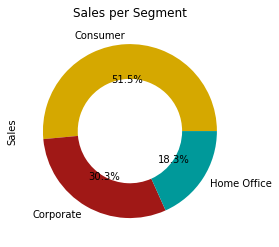

In [34]:
# Define matching colors for each segment
colors1 = ['#d5a800', '#a01816', '#00999a'] 

# Sales per Segment
segment = Data.groupby('Segment Name')[['Sales', 'Profit', 'Quantity']].sum()
segment.plot(kind='pie', y='Sales', legend=False, autopct='%1.1f%%', colors=colors1,wedgeprops=dict(width=0.4))
plt.title('Sales per Segment')
plt.show()

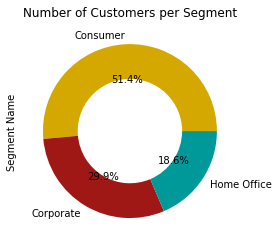

In [35]:
# Number of Customers per Segment
customer_segment_counts = Data.drop_duplicates(subset='Customer Name')['Segment Name'].value_counts()
customer_segment_counts.plot(kind='pie', legend=False, autopct='%1.1f%%', colors=colors1,wedgeprops=dict(width=0.4))
plt.title('Number of Customers per Segment')
plt.show()

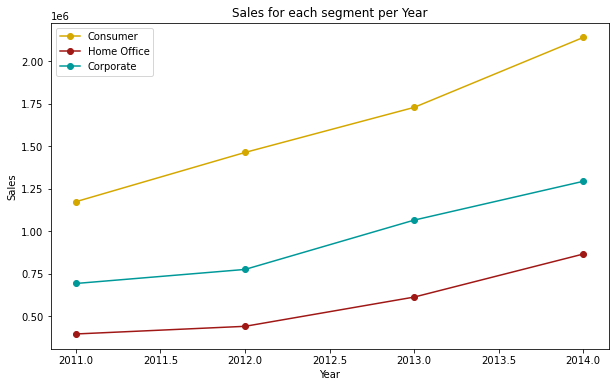

In [36]:
#Sales for each segment per Year
Segment = Data['Segment Name'].unique()
plt.figure(figsize=(10, 6))
for i, SE in enumerate(Segment):
    Segment_data = Data[Data['Segment Name'] == SE]
    Segment_sales_by_year = Segment_data.groupby('year')['Sales'].sum()  
    Segment_sales_by_year.plot(kind='line', marker='o', label=SE, color=colors1[i % len(colors1)])

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales for each segment per Year')
plt.legend()
plt.show()

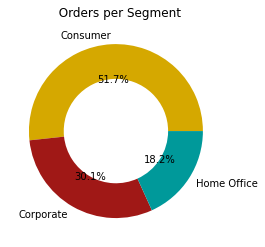

In [37]:
# Number of Orders per Segment
Segment_order = Data.groupby('Segment Name').size()
Segment_order.plot(kind='pie', y=0, legend=False, autopct='%1.1f%%', colors=colors1,wedgeprops=dict(width=0.4))
plt.ylabel('')
plt.title('  Orders per Segment')
plt.show()

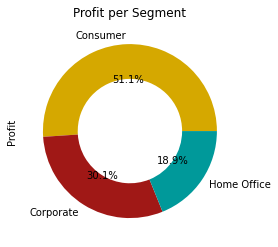

<Figure size 720x432 with 0 Axes>

In [38]:
# proit per Segment

segment.plot(kind='pie', y='Profit', legend=False, autopct='%1.1f%%', colors=colors1,wedgeprops=dict(width=0.4))
plt.title('Profit per Segment')
plt.figure(figsize=(10, 6))
plt.show()



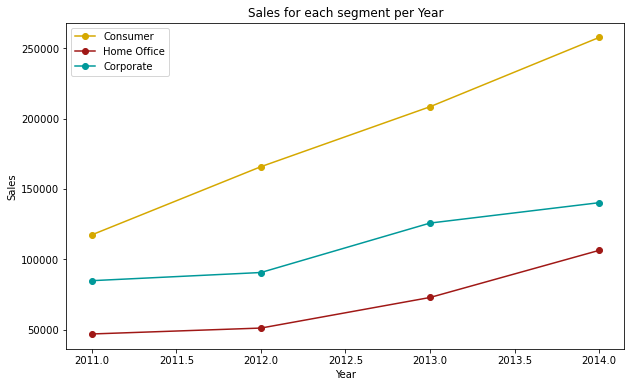

In [39]:
#Sales for each segment per Year
plt.figure(figsize=(10, 6))
for i, SE in enumerate(Segment):
    Segment_data = Data[Data['Segment Name'] == SE]
    Segment_sales_by_year = Segment_data.groupby('year')['Profit'].sum()  
    Segment_sales_by_year.plot(kind='line', marker='o', label=SE, color=colors1[i % len(colors1)])

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales for each segment per Year')
plt.legend()
plt.show()

In [40]:
# top 10 Customer sales 
Customer = Data.groupby(['Customer Name','Segment Name']).agg({
    'Sales': 'sum',
    'Profit':'sum',
    'Quantity':'sum',
    'Row ID': 'count'
}).reset_index()
Customer.rename(columns={
    'Sales':'Total Sales',
    'Profit' : 'Total Profit',
    'Quantity':'Total Quantity',
    'Row ID' : 'Total order'
},inplace=True)
Customer = Customer.sort_values(ascending=False,by='Total Sales')
pd.DataFrame(Customer.head(10))

,Customer Name,Segment Name,Total Sales,Total Profit,Total Quantity,Total order
758,Tom Ashbrook,Home Office,40488.070312,6311.979078,284,80
731,Tamara Chand,Corporate,37457.332206,8672.898445,271,88
313,Greg Tran,Consumer,35550.954414,5214.131154,310,87
157,Christopher Conant,Consumer,35187.075906,5603.333718,287,73
687,Sean Miller,Home Office,35170.933423,-409.706305,169,50
73,Bart Watters,Corporate,32310.446561,3595.885924,338,96
558,Natalie Fritzler,Consumer,31781.258494,1542.821137,325,95
290,Fred Hopkins,Corporate,30400.674567,4609.291149,290,82
347,Jane Waco,Corporate,30288.450020,6265.845655,298,75
335,Hunter Lopez,Consumer,30243.566288,7816.567938,207,53


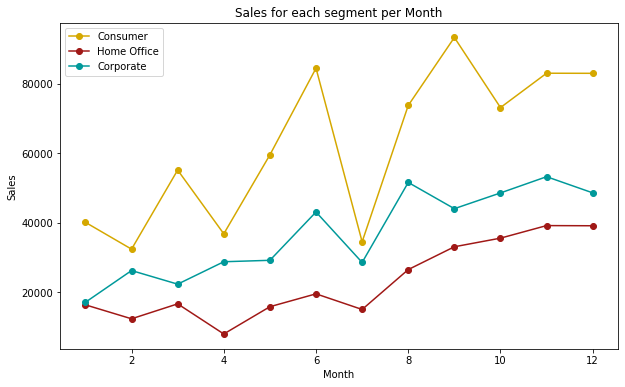

In [41]:
plt.figure(figsize=(10, 6))

for i, SE in enumerate(Segment):
    Segment_data = Data[Data['Segment Name'] == SE]
    Segment_sales_by_year = Segment_data.groupby('Month_num')['Profit'].sum()
    Segment_sales_by_year.plot(kind='line', label=SE, marker='o', color=colors1[i % len(colors1)])
plt.xlabel('Month') 
plt.ylabel('Sales')
plt.title('Sales for each segment per Month')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [42]:
Data

,Row ID,Order ID,Order Date,Customer Name,Segment Name,Ship Mode,Product Name,Category,Sub-category,Country,Region,State,City,Quantity,Sales,Profit,year,month,Month_num
0,1,MX-2014-143658,2014-10-02,Sonia Cooley,Consumer,Standard Class,"Hon File Folder Labels, Adjustable",Office Supplies,Labels,Mexico,North,Distrito Federal,Mexico City,3,13.080000,4.560000,2014,October,10
1,2,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Tenex Clock, Durable",Furniture,Furnishings,Colombia,South,Risaralda,Dos Quebradas,8,252.160004,90.720001,2012,October,10
2,3,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Ikea 3-Shelf Cabinet, Mobile",Furniture,Bookcases,Colombia,South,Risaralda,Dos Quebradas,2,193.279999,54.080002,2012,October,10
3,4,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Cardinal Binder, Clear",Office Supplies,Binders,Colombia,South,Risaralda,Dos Quebradas,4,35.439999,4.960000,2012,October,10
4,5,MX-2012-155047,2012-10-15,Kelly Williams,Consumer,Standard Class,"Sanford Canvas, Water Color",Office Supplies,Art,Colombia,South,Risaralda,Dos Quebradas,2,71.599998,11.440000,2012,October,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51286,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Avery Binder Covers, Economy",Office Supplies,Binders,Hungary,EMEA,Budapest,Budapest,1,11.070000,3.420000,2012,September,9
51286,51287,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Logitech Flash Drive, USB",Technology,Accessories,Hungary,EMEA,Budapest,Budapest,2,61.439999,18.420000,2012,September,9
51287,51288,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Boston Highlighters, Fluorescent",Office Supplies,Art,Hungary,EMEA,Budapest,Budapest,4,80.519997,20.879999,2012,September,9
51288,51289,HU-2012-7730,2012-09-05,Natalie Fritzler,Consumer,First Class,"Enermax Computer Printout Paper, 8.5 x 11",Office Supplies,Paper,Hungary,EMEA,Budapest,Budapest,4,130.440002,33.840000,2012,September,9


# Product overview

In [43]:
# Top 10 product
product = Data.groupby(['Product Name', 'Category', 'Sub-category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity':'sum',
    'Row ID': 'count'
}).reset_index()
product.rename(columns={
    'Sales' :'Total Sales',
    'Profit' : 'Total Profit',
    'Quantity':'Total Quantity',
    'Row ID' : 'Total order'
}, inplace=True)
product = product.sort_values(by='Total Profit',ascending=False)
product.head(10)

,Product Name,Category,Sub-category,Total Sales,Total Profit,Total Quantity,Total order
846,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.822266,25199.927979,20,5
948,"Cisco Smart Phone, Full Size",Technology,Phones,76441.531631,17238.520481,139,38
2353,"Motorola Smart Phone, Full Size",Technology,Phones,73156.302490,17027.112995,134,38
1876,"Hoover Stove, Red",Office Supplies,Appliances,25581.150024,11728.700191,51,12
3016,"Sauder Classic Bookcase, Traditional",Furniture,Bookcases,39108.302490,10672.073004,113,29
1667,"Harbour Creations Executive Leather Armchair, ...",Furniture,Chairs,50121.516266,10427.325960,142,39
2433,"Nokia Smart Phone, Full Size",Technology,Phones,71904.554932,9938.195755,147,47
949,"Cisco Smart Phone, with Caller ID",Technology,Phones,43313.500793,9535.541007,90,28
2434,"Nokia Smart Phone, with Caller ID",Technology,Phones,47877.784943,9465.325711,96,24
572,"Belkin Router, USB",Technology,Accessories,24870.207764,9384.756542,131,36


In [44]:
#  category
Category = product.groupby(['Category']).agg({
    'Sub-category':'nunique',
    'Product Name':'nunique',
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Total Quantity':'sum',
    'Total order':'sum'
}).reset_index()
Category

,Category,Sub-category,Product Name,Total Sales,Total Profit,Total Quantity,Total order
0,Furniture,4,826,4.110874e+06,285204.723407,34954,9876
1,Office Supplies,9,2007,3.787070e+06,518473.833515,108182,31273
2,Technology,4,850,4.744557e+06,663778.733210,35176,10141


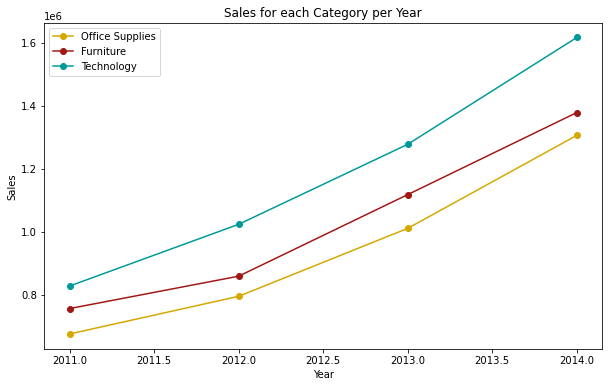

In [45]:
# category sales overyear 
categorys = Data['Category'].unique()
plt.figure(figsize=(10, 6))
for i , Cat in enumerate(categorys):
    Cat_data = Data[Data['Category']==Cat]
    Cat_salse = Cat_data.groupby('year')['Sales'].sum()
    Cat_salse.plot(kind = 'line',marker = 'o',label = Cat , color=colors1[i % len(colors1)] )
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales for each Category per Year')
plt.legend()
plt.show()

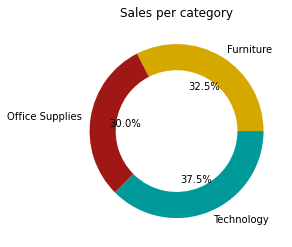

In [46]:
# category sales 
plt.pie(Category['Total Sales'], labels=Category['Category'], colors=colors1, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Sales per category')
plt.show()


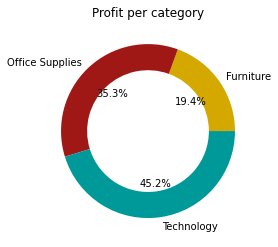

In [47]:
# category profit 
plt.pie(Category['Total Profit'], labels=Category['Category'], colors=colors1, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Profit per category')
plt.show()